In [6]:
import random
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.keras import models
from tensorflow.keras import layers

BATCH_SIZE = 32
IMG_SIZE = 224

TRAIN_DIR = './data/pre/train_images/'
TEST_DIR = './data/pre/test_images/'
ROOT_DIR = './data/pre/'
MODELS_DIR = './TempModels/2'

TRAIN_DF = pd.read_csv('./data/pre/train.csv')
TEST_DF = pd.read_csv('./data/pre/test.csv')

CNTS = np.array([[1443, 362],
                 [295, 75],
                 [799, 200],
                 [154, 39],
                 [235, 60]])

In [7]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

Using TensorFlow backend.


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 2345s 4us/step


In [28]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = './creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [33]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.90942144), ('n01871265', 'tusker', 0.08618243), ('n02504013', 'Indian_elephant', 0.004354584)]


In [50]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

In [90]:
from keras import backend as K
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0],african_elephant_output])
pooled_grads_value, conv_layer_output_value, aeu = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

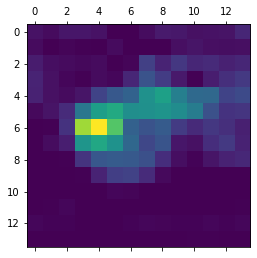

In [92]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [96]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = (heatmap * 0.4 + img).astype('uint')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


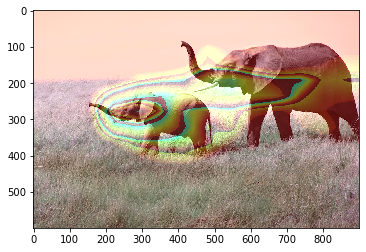

In [97]:
plt.imshow(superimposed_img)

In [107]:
im = conv_layer_output_value

In [113]:
ar = np.array([np.ones((3,2)),np.ones((3,2)) * 2,np.ones((3,2))*3,np.ones((3,2))*4])

In [114]:
ar.shape

(4, 3, 2)

In [115]:
ar

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[2., 2.],
        [2., 2.],
        [2., 2.]],

       [[3., 3.],
        [3., 3.],
        [3., 3.]],

       [[4., 4.],
        [4., 4.],
        [4., 4.]]])

In [103]:
ar.reshape((9,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])